### Import the Lirbraries and load the Dataset, Code names

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
%matplotlib inline

df = pd.read_csv('pre-precessed_dataset.csv')
codes = open('codes.txt','r').readlines()

df.head()

,Length ave. (nm),Diameter ave. (nm),BET (m2/g),Purity (%),Zave (batch),PdI (batch),Zave (12.5 ug/ml),PdI (12.5 ug/ml),Zave (200 ug/ml),PdI (200 ug/ml),...,COOH mmol/g,Endotoxins (EU/mg),Diameter min. (nm),Diameter max. (nm),Type_COOH,Type_NH2,Type_OH,Type_PRISTINE,% Total Impurities,Genotoxicity
0,0.000000,0.198214,0.559322,0.934783,0.036390,0.349333,0.020378,0.234910,0.067882,0.306306,...,0.079208,0.34,0.332558,0.206494,0.0,0.0,0.0,1.0,0.134906,0
1,0.093822,0.283929,0.567797,1.000000,0.066958,0.730667,0.132460,0.375204,0.054205,0.570571,...,0.405941,0.42,0.390698,0.298701,0.0,0.0,1.0,0.0,0.075646,0
2,0.039432,0.342857,0.521186,1.000000,0.035861,0.413333,0.014556,0.097879,0.031408,0.357357,...,1.000000,0.50,0.372093,0.394805,1.0,0.0,0.0,0.0,0.048780,0
3,0.048716,0.796429,0.271186,0.923913,0.011777,0.026667,0.000000,0.000000,0.013171,0.000000,...,0.034653,0.48,0.872093,0.775325,0.0,0.0,0.0,1.0,0.219889,0
4,0.156550,0.387500,0.237288,0.934783,0.045124,0.024000,0.425036,0.365416,0.241641,0.822823,...,0.044554,0.52,0.444186,0.419481,0.0,0.0,1.0,0.0,0.190736,1


### PCA Transformation

In order to transform the dataset, we must select the number of the Principal Components to keep.

In [2]:
# Extract the endpoint, so that the transformation will not be biased
endpoint = df.pop('Genotoxicity')

<Figure size 432x288 with 0 Axes>

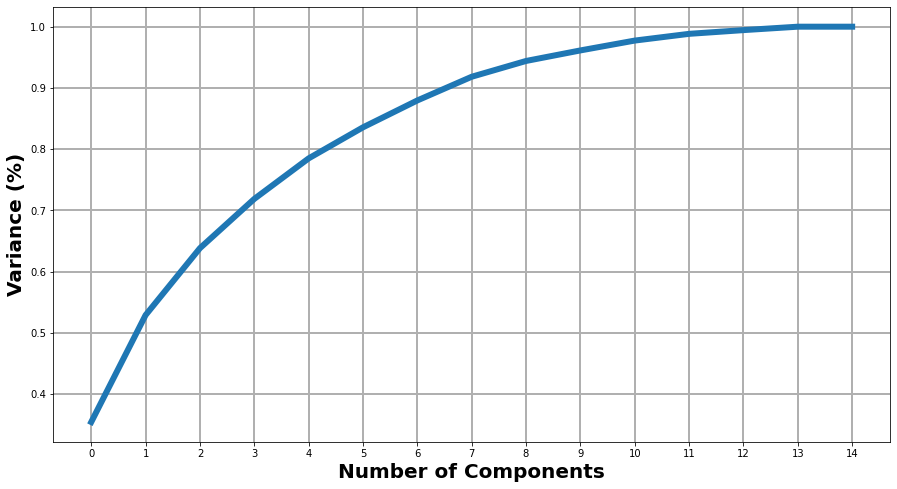

In [3]:
from sklearn.decomposition import PCA

#Fitting the PCA algorithm with our Data
pca = PCA().fit(df)

plt.figure()
plt.figure(figsize=(15,8))

plt.plot(np.cumsum(pca.explained_variance_ratio_),linewidth=6)
plt.xlabel('Number of Components', fontsize=20, fontweight = 'bold')
plt.ylabel('Variance (%)', fontsize=20, fontweight = 'bold')
#plt.title('Dataset Explained Variance', fontsize=20, fontweight = 'bold')
plt.grid(linestyle='-', linewidth=2)
plt.xticks(np.arange(0, len(df), 1))
plt.savefig('PCA.png')
plt.show()

In [4]:
# 9 Principal Components were kept, in order to exclude the noise and not lose information
n_comp =9
pca = PCA(n_components=n_comp)
x_pca = pca.fit_transform(df)

name_lst=[]
for i in range(n_comp):
    name_lst.append('Principal Component {}'.format(i))
    
x_pca = pd.DataFrame(x_pca,list(range(len(x_pca))),name_lst)


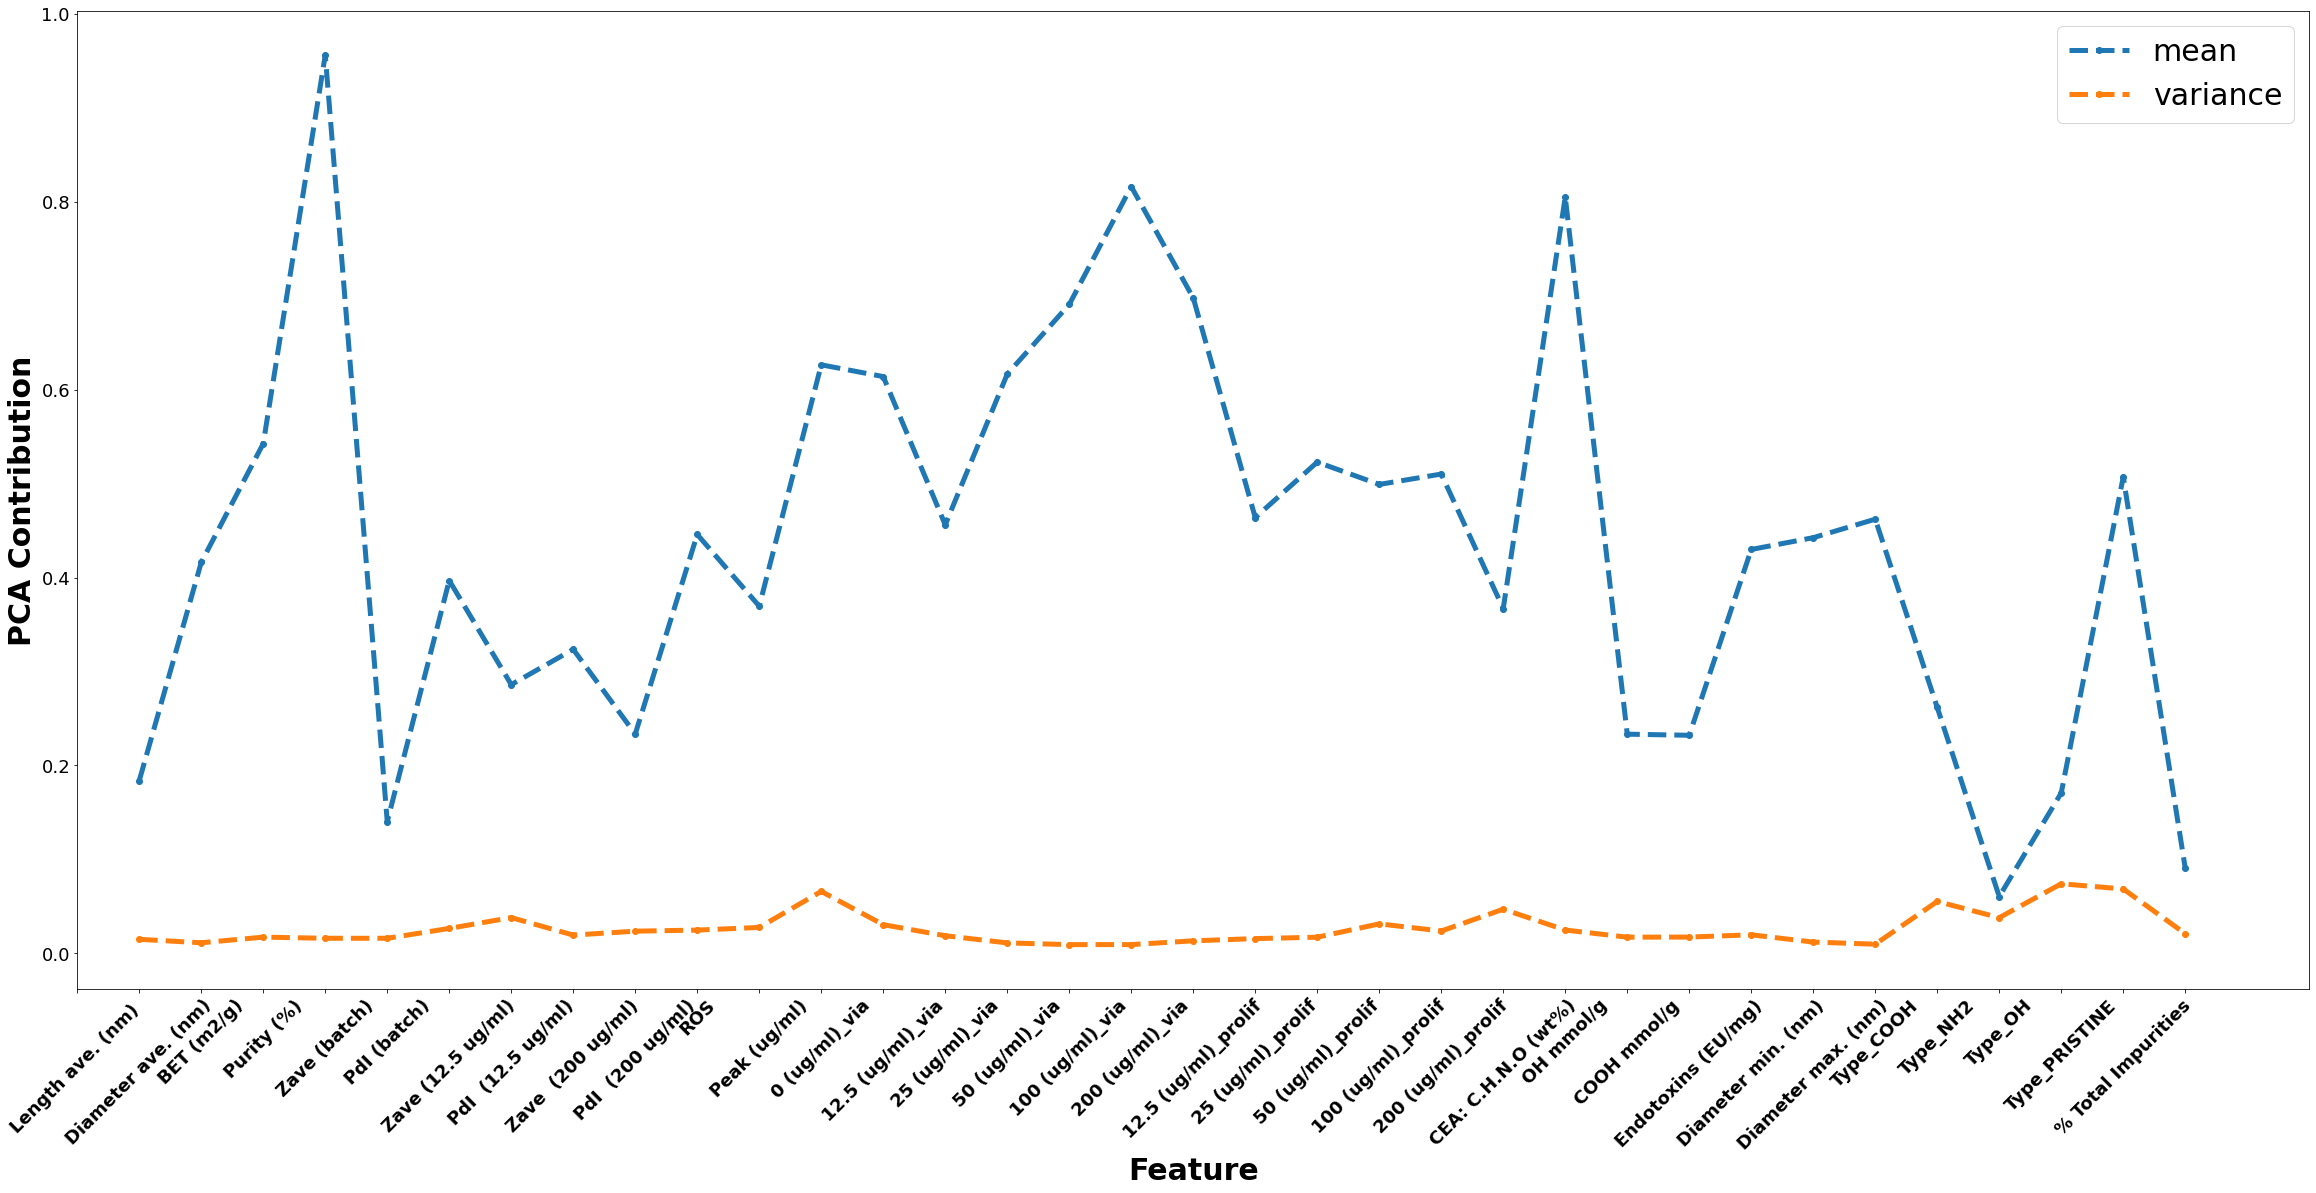

In [5]:
data=df.copy()
features = list(data.columns)

pca_data = pca.fit_transform(data)
pca_inv_data = pca.inverse_transform(np.eye(n_comp))

fig = plt.figure(figsize=(40, 18))
plt.plot(pca_inv_data.mean(axis=0), '--o', label = 'mean', linewidth=5.0)
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance', linewidth=5.0)

plt.legend(loc='upper right',fontsize=30)
plt.ylabel('PCA Contribution', fontsize=30, fontweight = 'bold');
plt.xlabel('Feature', fontsize=30, fontweight = 'bold');
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);

plt.xlim([-1, 35])
ticks = range(-1,34)
plt.xticks(ticks, features, fontsize=18, rotation=45, fontweight='bold');
fig.savefig('variance_vs_mean_plot.png')

In [6]:
x_pca['Genotoxicity'] = endpoint

In [7]:
x_pca.head()

,Principal Component 0,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Genotoxicity
0,0.217795,0.043651,0.046635,-0.483518,-0.462534,0.104073,0.117055,0.567357,-0.226720,0
1,0.546827,1.170945,-0.684714,-0.107559,-0.615303,0.543937,-0.319369,0.173835,0.053568,0
2,0.107842,1.306918,0.774619,-0.620141,0.195768,0.376223,0.059924,0.060519,0.196869,0
3,0.053869,-0.540837,1.222405,0.370042,-0.696248,-0.332422,0.460409,0.308189,-0.012788,0
4,0.037026,0.395050,0.020649,0.790298,-0.665678,-0.206716,-0.243203,-0.523065,0.124208,1


### Train-Test Split

In [8]:
from Kennard_Stone import kennardstonealgorithm

Using the Kennart-Stone algorithm, we split the dataset into 2 sets, one for training and one for validation

In [9]:
train, test, train_labels, test_labels = kennardstonealgorithm(x_pca,'Genotoxicity',5)

In [10]:
print('Training Features Shape:', train.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (10, 9)
Training Labels Shape: (10,)
Testing Features Shape: (5, 9)
Testing Labels Shape: (5,)


In [11]:
print('The names of the testing samples are:')
print('=====================================')
for i in test.index:
    print(codes[i][:-1])

The names of the testing samples are:
NRCWE- 040
NRCWE- 045
NRCWE- 048
NM-401
NM-402


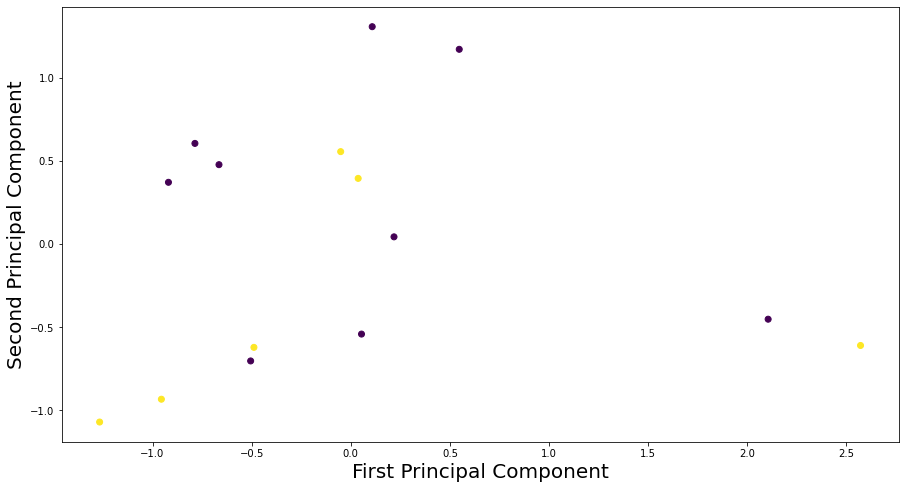

In [12]:
plt.figure(figsize=(15,8))
plt.scatter(x_pca.iloc[:,0],x_pca.iloc[:,1], c=x_pca.Genotoxicity);
plt.xlabel('First Principal Component', fontsize=20);
plt.ylabel('Second Principal Component', fontsize=20);

### Domain of Applicability

In [13]:
# Convert to numpy array
np_train_labels = np.array(train_labels)
np_test_labels = np.array(test_labels)
np_test = np.array(test)
np_train = np.array(train)

In [14]:
leverage_threshold = 3*np_train.shape[1]/np_train.shape[0]
print('The Leverage threshold is:', round(leverage_threshold, 2))

The Leverage threshold is: 2.7


In [15]:
from numpy.linalg import matrix_power
H=[]
reliability=[]
for i in range(len(np_test)):
    H.append(np_test[i].T@(matrix_power(np_train.T@np_train, -1))@np_test[i])
    if H[i]<=leverage_threshold:
        reliability.append('reliable')
    else:
        reliability.append('unreliable')

LV = [(sample[:-1], round(l_val, 2),rely) for sample, l_val, rely in zip(codes, H, reliability)]
for i in range(len(np_test)):
    [print('Sample: {:13} Leverage Value: {}    Reliability: {}'.format(LV[i][0],LV[i][1],LV[i][2]))];

Sample: NRCWE- 040    Leverage Value: 1.15    Reliability: reliable
Sample: NRCWE- 041    Leverage Value: 2.17    Reliability: reliable
Sample: NRCWE- 042    Leverage Value: 1.82    Reliability: reliable
Sample: NRCWE- 043    Leverage Value: 1.73    Reliability: reliable
Sample: NRCWE- 044    Leverage Value: 0.75    Reliability: reliable


### Import Bayesian Optimization Tool and Search for the Best Model

In [16]:
from Bayesian_Optimization import optimize_svm, optimize_rfc, optimize_lr

#### Optimization for the SVM model

In [17]:
# Get the time that the optimization started
start_time = datetime.now().strftime("%H:%M:%S")

# Boundaries of the hyperparameters
bo_dict={'C':(200,500) , 'gamma' : (1,2)}

# Optimization
svm_optimum = optimize_svm(train,train_labels,test,test_labels,bo_dict,5,2)

# Get the time that the optimization ended
end_time = datetime.now().strftime("%H:%M:%S")

Optimizing for linear kernel
|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
|  1        |  100.0    |  312.4    |  1.951    |
|  2        |  100.0    |  419.6    |  1.599    |
|  3        |  100.0    |  200.0    |  1.253    |
|  4        |  100.0    |  500.0    |  1.799    |
|  5        |  100.0    |  200.0    |  1.872    |
|  6        |  100.0    |  500.0    |  1.006    |
|  7        |  100.0    |  200.0    |  1.409    |
Optimizing for poly kernel
|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
|  1        |  60.0     |  312.4    |  1.951    |
|  2        |  60.0     |  419.6    |  1.599    |
|  3        |  60.0     |  200.0    |  1.253    |
|  4        |  60.0     |  500.0    |  1.799    |
|  5        |  60.0     |  200.0    |  1.872    |
|  6        |  60.0     |  500.0    |  1.006    |
|  7        |  60.0     |  200.0    |  1.409    |
Optimizing for rbf kernel
|   iter    |  tar

In [19]:
print('Minutes to execute:', 
      round((datetime.strptime(end_time, '%H:%M:%S') - datetime.strptime(start_time, '%H:%M:%S')).seconds/60,2))

Minutes to execute: 0.62


#### Optimization for the RF model

In [20]:
# Get the time that the optimization started
start_time = datetime.now().strftime("%H:%M:%S")

# Boundaries of the hyperparameters
bo_dict={"n_estimators": (10,1000), "min_samples_split": (0.1,0.9), "max_features": (0.5, 0.9)}

# Optimization
rf_optimum = optimize_rfc(train,train_labels,test,test_labels,bo_dict,15,3)

# Get the time that the optimization ended
end_time = datetime.now().strftime("%H:%M:%S")

|   iter    |  target   | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------
|  1        |  60.0     |  0.6498   |  0.8606   |  734.7    |
|  2        |  100.0    |  0.7395   |  0.2248   |  164.4    |
|  3        |  60.0     |  0.5232   |  0.7929   |  605.1    |
|  4        |  100.0    |  0.7427   |  0.2107   |  152.4    |
|  5        |  60.0     |  0.5      |  0.9      |  158.4    |
|  6        |  100.0    |  0.7929   |  0.2655   |  164.4    |
|  7        |  100.0    |  0.7686   |  0.2305   |  164.5    |
|  8        |  100.0    |  0.6867   |  0.3426   |  164.5    |
|  9        |  100.0    |  0.7485   |  0.1923   |  152.2    |
|  10       |  100.0    |  0.7624   |  0.351    |  152.3    |
|  11       |  100.0    |  0.9      |  0.2324   |  152.3    |
|  12       |  100.0    |  0.7975   |  0.2519   |  152.3    |
|  13       |  60.0     |  0.5      |  0.3365   |  152.3    |
|  14       |  100.0    |  0.8251   |  0.185    |  152.2    |
|  15   

In [21]:
print('Minutes to execute:', 
      round((datetime.strptime(end_time, '%H:%M:%S') - datetime.strptime(start_time, '%H:%M:%S')).seconds/60,2))

Minutes to execute: 0.25


#### Optimization for the LR model

In [22]:
# Get the time that the optimization started
start_time = datetime.now().strftime("%H:%M:%S")

# Boundaries of the hyperparameters
bo_dict={'C' : (80,130)}

# Optimization
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
lr_optimum = optimize_lr(train,train_labels,test,test_labels,bo_dict,3,2)

# Get the time that the optimization ended
end_time = datetime.now().strftime("%H:%M:%S")

Optimizing for l1 norm
|   iter    |  target   |     C     |
-------------------------------------
|  1        |  100.0    |  98.73    |
|  2        |  100.0    |  127.5    |
|  3        |  100.0    |  80.0     |
|  4        |  100.0    |  130.0    |
|  5        |  100.0    |  80.01    |
Optimizing for l2 norm
|   iter    |  target   |     C     |
-------------------------------------
|  1        |  80.0     |  98.73    |
|  2        |  80.0     |  127.5    |
|  3        |  80.0     |  80.0     |
|  4        |  80.0     |  130.0    |
|  5        |  80.0     |  80.01    |


Final result: The optimal model's accuracy is 100.0 and the optimal parameters are C=98.72700594236812 and penalty=l1


In [23]:
print('Minutes to execute:', 
      round((datetime.strptime(end_time, '%H:%M:%S') - datetime.strptime(start_time, '%H:%M:%S')).seconds/60,2))

Minutes to execute: 0.13


### Fit the models and Test the performance

In [19]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import cross_val_score
from sklearn.metrics import (accuracy_score,matthews_corrcoef,
                             classification_report, confusion_matrix)

#### Fit SVM

In [25]:
# Declare the model
svc = SVC(C=svm_optimum['params']['C'], gamma=svm_optimum['params']['gamma'], kernel=svm_optimum['params']['kernel'], random_state=42)

# Train the model on training data
svc.fit(train, train_labels);

###### Metrics on the Training set

In [26]:
# Use the model's predict method 
predictions = svc.predict(train)

In [27]:
# Print the Training accuracy
print("SVM's training accuracy:", accuracy_score(train_labels, predictions))

SVM's training accuracy: 1.0


In [28]:
# Print the classification report
print(classification_report(train_labels,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

   micro avg       1.00      1.00      1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [29]:
cm = confusion_matrix(train_labels,predictions)
print('Confusion Matrix:')
print(cm[0][0],'|',cm[0][1])
print('-----')
print(cm[1][0],'|',cm[1][1])

Confusion Matrix:
6 | 0
-----
0 | 4


In [26]:
tn, fp, fn, tp = confusion_matrix(train_labels,predictions).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print('Specificity:',specificity)
print('Sensitivity:',sensitivity)

Specificity: 1.0
Sensitivity: 1.0


In [30]:
# Print the MCC
print('MCC:', matthews_corrcoef(train_labels,predictions))

MCC: 1.0


In [31]:
#Print the Cross-Validation Score
scores = cross_val_score(svc, train, train_labels, cv=4)

print('List of scores:', scores)
print('Mean of Cross Validtation:', scores.mean())

List of scores: [0.66666667 0.66666667 0.5        1.        ]
Mean of Cross Validtation: 0.7083333333333333


###### Metrics on the Testing set

In [32]:
# Use the model's predict method
predictions = svc.predict(test)

In [33]:
# Print the Testing accuracy
print("SVM's testing accuracy:", accuracy_score(test_labels, predictions))

SVM's testing accuracy: 1.0


In [34]:
# Print the classification report
print(classification_report(test_labels,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [35]:
cm = confusion_matrix(test_labels,predictions)
print('Confusion Matrix:')
print(cm[0][0],'|',cm[0][1])
print('-----')
print(cm[1][0],'|',cm[1][1])

Confusion Matrix:
3 | 0
-----
0 | 2


In [28]:
tn, fp, fn, tp = confusion_matrix(test_labels,predictions).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print('Specificity:',specificity)
print('Sensitivity:',sensitivity)

Specificity: 1.0
Sensitivity: 1.0


In [36]:
# Print the MCC
print('MCC:', matthews_corrcoef(test_labels,predictions))

MCC: 1.0


#### Fit RF

In [37]:
# Declare the model
clf = RandomForestClassifier(n_estimators=rf_optimum['params']['n_estimators'], max_features=rf_optimum['params']['max_features'], min_samples_split=rf_optimum['params']['min_samples_split'],  random_state=42)

# Train the model on training data
clf.fit(train, train_labels);

###### Metrics on the Training set

In [38]:
# Use the model's predict method
predictions = clf.predict(train)

In [39]:
# Print the Train accuracy
print("RF's training accuracy:", accuracy_score(train_labels, predictions))

RF's training accuracy: 1.0


In [40]:
# Print the classification report
print(classification_report(train_labels,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

   micro avg       1.00      1.00      1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [41]:
cm = confusion_matrix(train_labels,predictions)
print('Confusion Matrix:')
print(cm[0][0],'|',cm[0][1])
print('-----')
print(cm[1][0],'|',cm[1][1])

Confusion Matrix:
6 | 0
-----
0 | 4


In [29]:
tn, fp, fn, tp = confusion_matrix(train_labels,predictions).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print('Specificity:',specificity)
print('Sensitivity:',sensitivity)

Specificity: 1.0
Sensitivity: 1.0


In [42]:
# Print the MCC
print('MCC:', matthews_corrcoef(train_labels,predictions))

MCC: 1.0


In [43]:
#Print the Cross-Validation Score
scores = cross_val_score(clf, train, train_labels, cv=4)

print('List of scores:', scores)
print('Mean of Cross Validtation:', scores.mean())

List of scores: [0.33333333 0.33333333 0.5        0.        ]
Mean of Cross Validtation: 0.29166666666666663


###### Metrics on the Testing set

In [44]:
# Use the model's predict method
predictions = clf.predict(test)

In [45]:
# Print the Test accuracy
print("RF's testing accuracy:", accuracy_score(test_labels, predictions))

RF's testing accuracy: 1.0


In [46]:
# Print the classification report
print(classification_report(test_labels,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [47]:
cm = confusion_matrix(test_labels,predictions)
print('Confusion Matrix:')
print(cm[0][0],'|',cm[0][1])
print('-----')
print(cm[1][0],'|',cm[1][1])

Confusion Matrix:
3 | 0
-----
0 | 2


In [30]:
tn, fp, fn, tp = confusion_matrix(test_labels,predictions).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print('Specificity:',specificity)
print('Sensitivity:',sensitivity)

Specificity: 1.0
Sensitivity: 1.0


In [48]:
# Print the MCC
print('MCC:', matthews_corrcoef(test_labels,predictions))

MCC: 1.0


#### Fit LR

In [49]:
# Declare the model
logmodel = LogisticRegression(C=lr_optimum['params']['C'], penalty=lr_optimum['params']['norm'],random_state=42)

# Train the model on training data
logmodel.fit(train, train_labels);

###### Metrics on the Training set

In [50]:
# Use the model's predict method
predictions = logmodel.predict(train)

In [51]:
# Print the train accuracy
print("LR's training accuracy:", accuracy_score(train_labels, predictions))

LR's training accuracy: 1.0


In [52]:
# Print the classification report
print(classification_report(train_labels,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

   micro avg       1.00      1.00      1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [53]:
cm = confusion_matrix(train_labels,predictions)
print('Confusion Matrix:')
print(cm[0][0],'|',cm[0][1])
print('-----')
print(cm[1][0],'|',cm[1][1])

Confusion Matrix:
6 | 0
-----
0 | 4


In [31]:
tn, fp, fn, tp = confusion_matrix(train_labels,predictions).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print('Specificity:',specificity)
print('Sensitivity:',sensitivity)

Specificity: 1.0
Sensitivity: 1.0


In [54]:
# Print the MCC
print('MCC:', matthews_corrcoef(train_labels,predictions))

MCC: 1.0


In [55]:
#Print the Cross-Validation Score
scores = cross_val_score(logmodel, train, train_labels, cv=4)

print('List of scores:', scores)
print('Mean of Cross Validtation:', scores.mean())

List of scores: [0.33333333 0.66666667 1.         0.5       ]
Mean of Cross Validtation: 0.625


###### Metrics on the Testing set

In [56]:
# Use the model's predict method
predictions = logmodel.predict(test)

In [57]:
# Print the Test accuracy
print("LR's testing accuracy:", accuracy_score(test_labels, predictions))

LR's testing accuracy: 1.0


In [58]:
# Print the classification report
print(classification_report(test_labels,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [59]:
cm = confusion_matrix(test_labels,predictions)
print('Confusion Matrix:')
print(cm[0][0],'|',cm[0][1])
print('-----')
print(cm[1][0],'|',cm[1][1])

Confusion Matrix:
3 | 0
-----
0 | 2


In [32]:
tn, fp, fn, tp = confusion_matrix(test_labels,predictions).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print('Specificity:',specificity)
print('Sensitivity:',sensitivity)

Specificity: 1.0
Sensitivity: 1.0


In [60]:
# Print the MCC
print('MCC:', matthews_corrcoef(test_labels,predictions))

MCC: 1.0


#### Fit NB

In [61]:
# Declare the model
gnb = GaussianNB()

# Train the model on training data
gnb.fit(train,train_labels);

###### Metrics on the Training set

In [62]:
# Use the model's predict method
predictions = gnb.predict(train)

In [63]:
# Print the train accuracy
print("NB's accuracy:", accuracy_score(train_labels,predictions))

NB's accuracy: 1.0


In [64]:
# Print the classification report
print(classification_report(train_labels,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

   micro avg       1.00      1.00      1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [65]:
cm = confusion_matrix(train_labels,predictions)
print('Confusion Matrix:')
print(cm[0][0],'|',cm[0][1])
print('-----')
print(cm[1][0],'|',cm[1][1])

Confusion Matrix:
6 | 0
-----
0 | 4


In [33]:
tn, fp, fn, tp = confusion_matrix(train_labels,predictions).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print('Specificity:',specificity)
print('Sensitivity:',sensitivity)

Specificity: 1.0
Sensitivity: 1.0


In [66]:
# Print the MCC
print('MCC:', matthews_corrcoef(train_labels,predictions))

MCC: 1.0


In [67]:
#Print the Cross-Validation Score
scores = cross_val_score(gnb, train, train_labels, cv=4)

print('List of scores:', scores)
print('Mean of Cross Validtation:', scores.mean())

List of scores: [0.66666667 0.66666667 0.5        1.        ]
Mean of Cross Validtation: 0.7083333333333333


###### Metrics on the Testing set

In [68]:
# Use the model's predict method on the test data
predictions = gnb.predict(test)

In [69]:
# Print the Test accuracy
print("NB's accuracy:", accuracy_score(test_labels,predictions))

NB's accuracy: 0.6


In [70]:
# Print the classification report
print(classification_report(test_labels,predictions))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.50      0.50      0.50         2

   micro avg       0.60      0.60      0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



In [71]:
cm = confusion_matrix(test_labels,predictions)
print('Confusion Matrix:')
print(cm[0][0],'|',cm[0][1])
print('-----')
print(cm[1][0],'|',cm[1][1])

Confusion Matrix:
2 | 1
-----
1 | 1


In [36]:
tn, fp, fn, tp = confusion_matrix(test_labels,predictions).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print('Specificity:',specificity)
print('Sensitivity:',sensitivity)

Specificity: 0.6666666666666666
Sensitivity: 0.5


In [73]:
# Print the MCC
print('MCC:', matthews_corrcoef(test_labels,predictions))

MCC: 0.16666666666666666
